## Feature Store Fundamentals, Terminology, and Usage

- https://github.com/PacktPublishing/Feature-Store-for-Machine-Learning/blob/main/Chapter03/feast_intro.ipynb

### Introduction to Feast and installation

### Feast terminology and definitions

이 섹션에서는 이러한 용어가 무엇인지 알아봅시다.  
- 엔티티: 엔티티는 의미적으로 관련된 피처의 모음입니다.  
엔티티는 피처를 매핑할 수 있는 도메인 객체입니다.  
차량 호출 서비스에서는 고객과 드라이버가 엔티티가 될 수 있으며, 해당 엔티티로 피처를 그룹화할 수 있습니다.  
다음 코드 블록은 엔티티 정의의 예시입니다:

```python
driver = Entity(name='driver', value_type=ValueType.STRING,
join_key='driver_id')
```

엔티티는 피처 수집 및 검색 프로세스에서 기본 키 역할을 하는 피처 룩업의 일부입니다.  
모델 학습 및 예측 중에 각각 기본 키에서 특정 시점(Point-in-time) 조인 및 피처 조회를 수행할 수 있습니다.

- feature: 피처는 측정 가능한 개별 속성입니다. 일반적으로  피처 엔티티에서 관찰되는 속성이지만 엔티티와 연관될 필요는 없습니다. 예를 들어, 고객이 웹사이트에서 보내는 평균 시간이 피처가 될 수 있습니다. 연관되지 않은 피처는 오늘 웹사이트의 신규 고객 수일 수 있습니다. 다음 코드 블록은 기능 정의의 예입니다:

```python
trips_today = Feature(name="trips_today",
dtype=ValueType.INT64)
```

피처는 기본 피처 데이터의 컬럼을 나타냅니다.  
앞의 예에서 볼 수 있듯이 name 및 dtype 속성이 있습니다.

- Data source: The data source represents the underlying data. Feast supports a range of
data sources including FileSource (local, S3, GCS), BigQuery, and Redshift.
The following screenshot is an example data source:

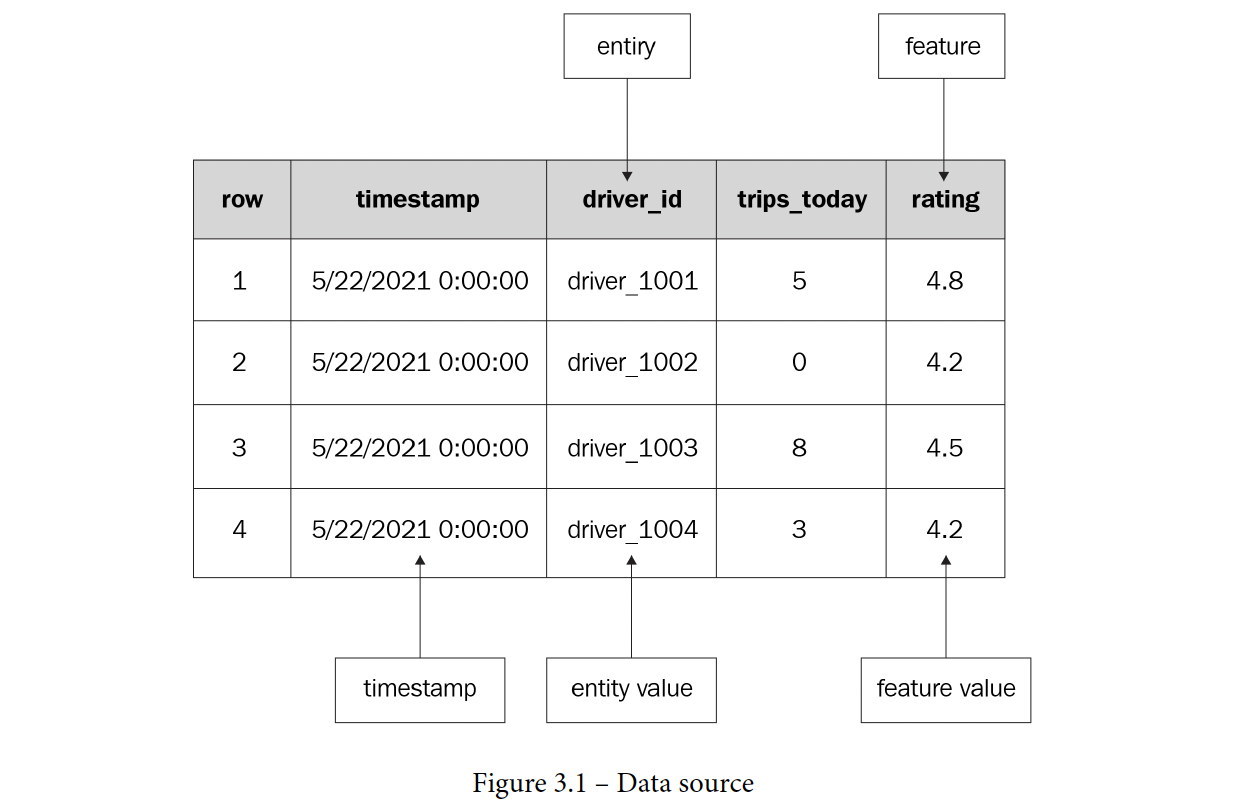

As you can see in the preceding figure, the dataset has a driver_id entity, trips_
today and rating features, and a timestamp column. The structure of the data in the
table you see in Figure 3.1 is a Feature view.

- feature view: 피처뷰는 데이터베이스 테이블과 같으며, 소스에 있는 피처 데이터의 구조를 나타냅니다. 피처 뷰는 엔티티, 하나 이상의 피처, 데이터 소스로 구성됩니다. 피처뷰는 일반적으로 데이터베이스 개체와 유사한 도메인 개체를 중심으로 모델링됩니다. 

피처 뷰에 엔티티가 없는 경우도 있는데, 다음 코드 블록은 피처 뷰 정의의 예입니다:

```python
driver_stats_fv = FeatureView(
name="driver_activity",
entities=["driver"],
ttl=timedelta(hours=2),
features=[
Feature(name="trips_today", dtype=ValueType.INT64),
Feature(name="rating", dtype=ValueType.FLOAT),
],
batch_source=BigQuerySource(
table_ref="feast-oss.demo_data.driver_activity"
)
)
```

앞의 코드 블록에서 볼 수 있듯이 FeatureView에는 driveer 엔티티, trips_today 및 rating feature가 있으며 데이터 소스로는 BigQuerySource가 있습니다.      

피처 스토어에 따라 피처 뷰에는 다른 동의어가 있습니다. 예를 들어, SageMaker FeatureStore에서는 Feature Group이라고 하고, Databricks Feature Store에서는 Feature Table이라고 하며, Feast의 이전 버전에서는 Feature Set 및 Feature Table이라고 합니다.

- Point-in-time joins: 이전 장에서는 모델 재현성과 데이터/예측 문제 디버깅을 위해 시스템 상태를 재현하기 위한 데이터 과학자의 필요성에 대해 설명했습니다. Feast와 다른 피처 스토어에서 데이터는 시계열 레코드로 모델링됩니다. 그림 3.1에서 볼 수 있듯이, 타임스탬프 컬럼은 특정 이벤트가 발생한 시점(즉, 시스템에서 특정 이벤트가 생성된 시점)에 대한 정보를 저장합니다. 이와 함께, 피처 저장소는 생성 시간, 수집 API 호출 시간 등과 같은 추가 열을 추가할 수 있는 유연성을 제공합니다. 이를 통해 데이터 과학자와 데이터 엔지니어는 과거의 어느 때라도 시스템의 상태를 재현할 수 있습니다. 과거의 상태를 재현하기 위해 시스템은 Point-in-time 조인을 수행합니다. Feast에서는 이 기능을 API로 바로 사용할 수 있습니다. 다른 솔루션에서는 사용자가 직접 코드를 작성해야 할 수도 있습니다.